In [1]:
!pip install numpy pandas matplotlib seaborn --quiet 

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
TS_df = pd.read_csv('/Users/jpate/Downloads/Officer_Traffic_Stops.csv')

In [6]:
#check for null values
TS_df.isnull().sum()

OBJECTID                       0
Month_of_Stop                  0
Reason_for_Stop                0
Officer_Race                   0
Officer_Gender                 0
Officer_Years_of_Service       0
Driver_Race                    0
Driver_Ethnicity               0
Driver_Gender                  0
Driver_Age                     0
Was_a_Search_Conducted         0
Result_of_Stop                 0
CMPD_Division               3909
GlobalID                       0
dtype: int64

In [7]:
TS_df['CMPD_Division']

0         University City Division
1              Providence Division
2         University City Division
3            Steele Creek Division
4                 Eastway Division
                    ...           
136144                         NaN
136145                         NaN
136146                         NaN
136147                         NaN
136148                         NaN
Name: CMPD_Division, Length: 136149, dtype: object

In [9]:
TS_df['is_division_unknown'] = TS_df['CMPD_Division'].isnull()

In [10]:
TS_df = TS_df.drop(['GlobalID'], axis=1)

In [11]:
TS_df = TS_df.drop(['OBJECTID'], axis=1)

In [12]:
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [13]:
TS_no_nulls = TS_df.dropna()

In [16]:
#List = ['Month_of_Stop','Reason_for_Stop','Officer_Race','Officer_Gender',
        #'Officer_Years_of_Service','Driver_Race','Driver_Ethnicity','Driver_Gender',
       # 'Driver_Age','Was_a_Search_Conducted','Result_of_Stop','CMPD_Division','is_division_unknown']

In [17]:
#cramers_v((for i in list),'Was_a_Search_Conducted')

In [16]:
TS_Searches = TS_no_nulls[TS_no_nulls['Was_a_Search_Conducted'] == 'Yes']

In [21]:
TS_Searches['is_division_unknown'].dtype

dtype('bool')

In [22]:
TS_Searches['Reason_for_Stop'].unique()

array(['Vehicle Regulatory       ', 'Investigation            ',
       'Safe Movement            ', 'Vehicle Equipment        ',
       'Speeding                 ', 'Stop Light/Sign          ',
       'SeatBelt                 ', 'Driving While Impaired   ',
       'Other                    ', 'CheckPoint               '],
      dtype=object)

In [24]:
data_df_no_nulls.dtypes

Month_of_Stop               object
Reason_for_Stop             object
Officer_Race                object
Officer_Gender              object
Officer_Years_of_Service     int64
Driver_Race                 object
Driver_Ethnicity            object
Driver_Gender               object
Driver_Age                   int64
Was_a_Search_Conducted      object
Result_of_Stop              object
CMPD_Division               object
is_division_unknown           bool
dtype: object

#viz

<AxesSubplot:title={'center':'Searches by Traffic Stop Reason'}>

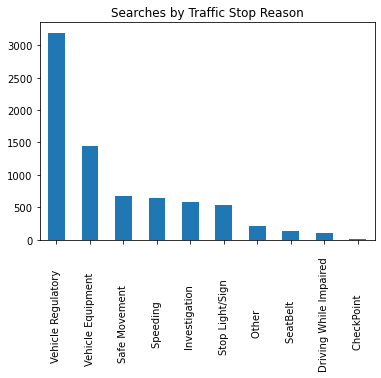

In [18]:
TS_Searches['Reason_for_Stop'].value_counts().plot(kind='bar', title='Searches by Traffic Stop Reason')

<AxesSubplot:title={'center':'Searches by Driver Gender'}>

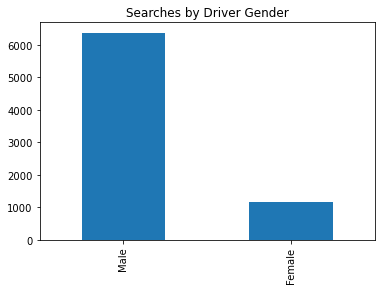

In [19]:
TS_Searches['Driver_Gender'].value_counts().plot(kind='bar', title='Searches by Driver Gender')

In [20]:
np.count_nonzero(TS_no_nulls['Driver_Gender'] == 'Male')

82149

In [22]:
np.count_nonzero(TS_Searches['Driver_Gender'] == 'Male')

6377

<AxesSubplot:title={'center':'Searches by Police Division'}>

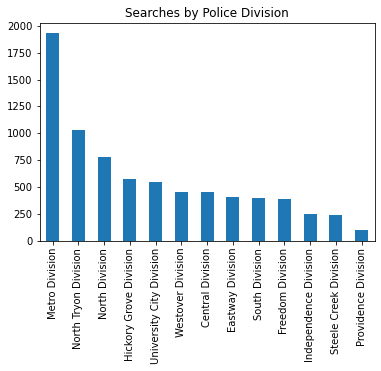

In [23]:
TS_Searches['CMPD_Division'].value_counts().plot(kind='bar', title='Searches by Police Division')

In [24]:
TS_Searches['is_division_unknown'].plot(kind='bar', title='Searches by Unkown Divisions')

TypeError: no numeric data to plot

In [25]:
labels = ['25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-76']
bins =[0,30,35,40,45,50,55,60,65,70,76]
TS_Searches['Ages'] = pd.cut(TS_Searches['Driver_Age'], bins=bins, labels=labels, right=True)


/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_13351/710464493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS_Searches['Ages'] = pd.cut(TS_Searches['Driver_Age'], bins=bins, labels=labels, right=True)


In [35]:
#total<we> = df_data_Searches[label name].value_counts()['label name']

SyntaxError: invalid syntax (2116012627.py, line 1)

<AxesSubplot:title={'center':'Searches by Age Group'}>

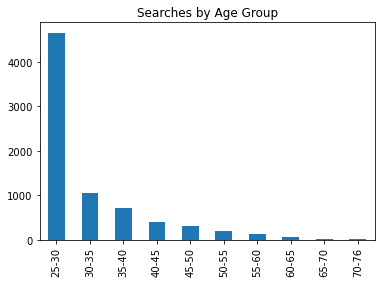

In [26]:
TS_Searches['Ages'].value_counts().plot(kind='bar', title='Searches by Age Group')

<AxesSubplot:title={'center':'Searches by Officer Race'}>

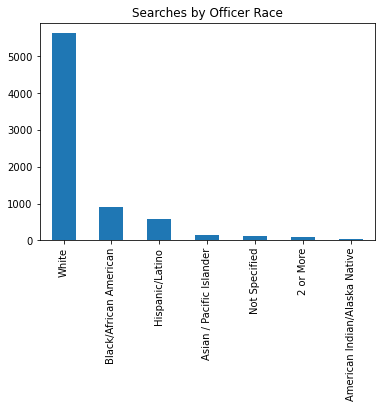

In [27]:
TS_Searches['Officer_Race'].value_counts().plot(kind='bar', title='Searches by Officer Race')

In [31]:
TS_Month_Sort = TS_Searches.sort_values('Month_of_Stop')

In [34]:
#FIX

<AxesSubplot:title={'center':'Searches by Month'}>

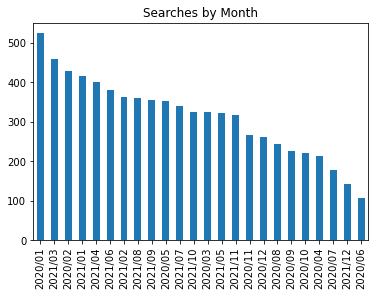

In [32]:
TS_Month_Sort['Month_of_Stop'].value_counts().plot(kind='bar', title='Searches by Month')

<AxesSubplot:title={'center':'Result After Search'}>

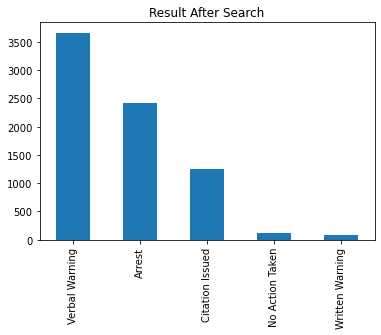

In [37]:
TS_Searches['Result_of_Stop'].value_counts().plot(kind='bar', title='Result After Search')

<AxesSubplot:title={'center':'Searches by Driver Race'}>

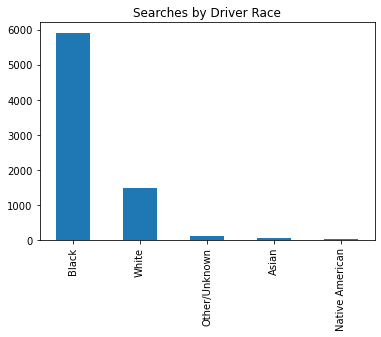

In [38]:
TS_Searches['Driver_Race'].value_counts().plot(kind='bar', title='Searches by Driver Race')

In [46]:
np.count_nonzero(data_df_no_nulls['Driver_Race'] == 'Black')

74669

In [47]:
np.count_nonzero(df_data_Searches['Driver_Race'] == 'Black')

5912

In [50]:
np.count_nonzero(data_df_no_nulls['Driver_Race'] == 'White')

49644

In [43]:
np.count_nonzero(df_data_Searches['Driver_Race'] == 'White')

1478

In [51]:
np.count_nonzero(data_df_no_nulls['Driver_Race'] == 'Other/Unkown')

0

In [44]:
np.count_nonzero(df_data_Searches['Driver_Race'] == 'Other/Unknown')

92

In [49]:
5912/74669

0.0791760971755347